In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(
    filepath_or_buffer='/Users/jpan/Environments/research_related/research/clinical_brain_combined.csv',  
    sep=',')

,Unnamed: 0,Subject_ID,BH,Sex,Age,BMI,YFAS_Study,YFAS_Withdrawal,YFAS_Tolerance,YFAS_ContinuedUse,...,RS__R_PO_to_L_PO_AAN,RS__L_PPN_to_L_PO_AAN,RS__R_PPN_to_L_PO_AAN,RS__VTA_to_L_PO_AAN,RS__L_PPN_to_R_PO_AAN,RS__R_PPN_to_R_PO_AAN,RS__VTA_to_R_PO_AAN,RS__R_PPN_to_L_PPN_AAN,RS__VTA_to_L_PPN_AAN,RS__VTA_to_R_PPN_AAN
0,1,A4588,4.0,1,60,33.143166,R01_Pheno,0,0.0,0,...,-0.022791,-0.198313,-0.047394,-0.070542,-0.035315,0.005049,0.031446,0.268287,0.088864,0.144356
1,2,A4671,4.0,2,30,29.334969,R21_Meth,0,2.0,1,...,0.179013,0.105167,0.152292,0.200379,0.223203,0.222008,0.208300,0.097813,0.205215,0.330153
2,13,A5413,4.0,2,35,27.294609,R01_Pheno,0,0.0,0,...,0.543189,0.204418,-0.112908,-0.255011,0.434927,-0.011621,-0.142550,-0.039149,-0.141832,0.363079
3,19,A5505,4.0,2,57,19.592974,R01_Pheno,0,0.0,0,...,0.600855,-0.019976,-0.166950,0.071267,0.150003,0.084719,0.185425,0.159637,0.471722,0.366857
4,88,A6069,4.0,1,44,25.765818,SCOR VAT,0,0.0,0,...,0.097334,0.097081,-0.010329,0.122038,0.159939,0.011465,-0.025293,-0.068406,-0.162844,0.194556
5,93,A6102,4.0,2,33,35.384335,BSIO,0,0.0,0,...,0.476891,0.165208,0.220364,0.036956,0.121377,0.205396,-0.341509,0.203574,0.123505,-0.065765
6,101,A6151,4.0,2,20,24.241379,Multimodal2,0,0.0,0,...,0.296458,0.123845,0.228162,0.122425,0.367666,0.154935,0.026234,0.305747,0.126126,0.185213
7,103,A6154,4.0,1,30,33.262062,BSIO,0,0.0,0,...,0.152967,0.165985,-0.007809,0.226021,0.146722,0.035850,0.123202,-0.048404,0.078676,0.301484
8,104,A6170,4.0,2,23,26.922651,SCOR VAT,0,0.0,0,...,0.438214,0.266010,0.196213,0.238986,0.076934,0.352380,0.245743,0.047242,0.144183,0.403738
9,105,A6172,4.0,2,38,23.238499,SCOR VAT,0,0.0,0,...,0.285840,0.011637,-0.084407,-0.126919,0.105083,0.102110,-0.065161,-0.045148,-0.082446,0.036427


In [28]:
# Get rid of first column
df = df.drop(columns='Unnamed: 0')

In [58]:
# Add a binary column YFAS_SC_binary for SVM (Not Necessarily Classification, Can Use SVRegression Too)
binList = []
for i in range(len(df)):
    if df.iloc[i,14]>2:
        binList.insert(i,1)
    else:
        binList.insert(i,0)
        
df['YFAS_SC_binary'] = binList

In [61]:
# Separate features and labels
X = df.iloc[:,19:6779]
y = df.iloc[:,6780]

# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA here
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.27882915e-01, 4.57899728e-02, 3.93347120e-02, 2.56583451e-02,
       2.43245982e-02, 2.23074031e-02, 2.10398910e-02, 1.77207770e-02,
       1.70014752e-02, 1.57968592e-02, 1.49046768e-02, 1.37752170e-02,
       1.35800369e-02, 1.30351254e-02, 1.20034167e-02, 1.15229744e-02,
       1.09386737e-02, 1.08817512e-02, 1.03624315e-02, 1.02217062e-02,
       9.74212634e-03, 9.57942363e-03, 9.42950113e-03, 9.20573598e-03,
       8.76531217e-03, 8.52918570e-03, 8.46627301e-03, 8.23062124e-03,
       8.07188035e-03, 8.02331899e-03, 7.77371039e-03, 7.62725132e-03,
       7.34358270e-03, 7.26848189e-03, 7.11704462e-03, 7.04819093e-03,
       6.89990375e-03, 6.87506471e-03, 6.80635130e-03, 6.75048393e-03,
       6.61110156e-03, 6.47368943e-03, 6.42359345e-03, 6.36857818e-03,
       6.22696151e-03, 6.16315765e-03, 6.05733929e-03, 6.02183780e-03,
       5.86585396e-03, 5.67425877e-03, 5.63943039e-03, 5.61895096e-03,
       5.50733709e-03, 5.42141386e-03, 5.35832187e-03, 5.28313721e-03,
      

In [64]:
y

0      0
1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
139    0
140    0
141    0
142    0
143    0
144    1
145    0
146    0
147    0
148    0
149    0
150    0
151    0
152    0
153    1
154    0
155    0
156    0
157    1
158    0
159    1
160    0
161    1
162    0
163    0
164    0
165    0
166    1
167    1
168    0
Name: YFAS_SC_binary, Length: 169, dtype: int64

In [80]:
# TRYING WITH TWO PRINCIPAL COMPONENTS

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components= 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

#Predict the test set values
y_pred = classifier.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[28,  0],
       [ 6,  0]])

In [101]:
# TRYING WITH TEN PRINCIPAL COMPONENTS

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components= 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

#Predict the test set values
y_pred = classifier.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[27,  0],
       [ 7,  0]])

In [100]:
# TRYING WITH TWENTY PRINCIPAL COMPONENTS

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components= 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

#Predict the test set values
y_pred = classifier.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  0],
       [ 5,  0]])

In [97]:
# TRYING WITH FIFTY PRINCIPAL COMPONENTS

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components= 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

#Predict the test set values
y_pred = classifier.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[26,  3],
       [ 5,  0]])

In [69]:
# TRYING WITH EIGHTY PRINCIPAL COMPONENTS

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components= 80)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

#Predict the test set values
y_pred = classifier.predict(X_test)

#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[21,  9],
       [ 3,  1]])

In [ ]:
### SEEMS AS IF ~20 PC'S WITH LOGISTIC REGRESSION GENERATE THE BEST ACCURACY THROUGH TRIAL AND ERROR B

In [ ]:
### LOGISTIC REGRESSION IS LINEAR. NOW LET'S TRY A NON-LINEAR SVM AND COMPARE RESULTS

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,y_train)

# Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[28,  0],
       [ 6,  0]])

In [120]:
# Apply k-fold validation here

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_svm_kernel, X=X_train, y=y_train, cv=10)
accuracies

array([0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.78571429, 0.84615385, 0.83333333, 0.83333333])

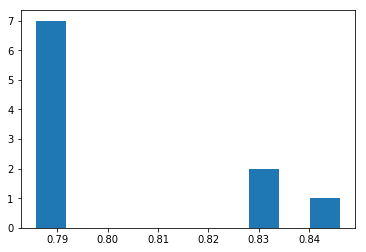

In [121]:
plt.hist(accuracies)
plt.show()

In [122]:
#Applying grid search for optimal parameters and model after k-fold validation

from sklearn.model_selection import GridSearchCV

parameters = [{'C':[0.01,0.1,1,10,50,100,500,1000], 'kernel':['rbf'], 'gamma': [0.1,0.125,0.15,0.17,0.2]}]
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [123]:
#Reloading the features and labels and normalizing them
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Choosing different principal components
pca = PCA(n_components= 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Create classifier object
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,y_train)

# Grid search and k fold validation libraries already imported. So start the grid search
grid_search = GridSearchCV(estimator=classifier_svm_kernel, param_grid=parameters, scoring ='accuracy',cv=10,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

best_accuracy = grid_search.best_score_
best_accuracy

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7703703703703704